# Actividad 4 (Regresión Lineal Simple)
## Luis Javier González Romero - A01702728

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo csv
df=pd.read_csv('DF_Mexico.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

# Valores nulos

In [4]:
#Eliminar columnas innecesarias
#axis = 1 para columnas
#axis = 0 para filas
df_num = df[df.columns[[16,17,40,54,56,63,65,66,74]]]
df_num

,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,100%,NaN,"$1,434.00",324,21,4.95,4.95,5.00,0.19
1,NaN,NaN,$830.00,346,61,4.88,5.00,4.95,0.54
2,100%,90%,"$1,469.00",87,39,4.71,4.92,4.58,0.31
3,NaN,NaN,"$3,658.00",363,0,NaN,NaN,NaN,NaN
4,100%,86%,"$18,000.00",357,64,4.70,4.78,4.98,0.46
...,...,...,...,...,...,...,...,...,...
24219,100%,100%,$760.00,352,0,NaN,NaN,NaN,NaN
24220,NaN,NaN,"$1,520.00",365,0,NaN,NaN,NaN,NaN
24221,NaN,96%,$533.00,180,0,NaN,NaN,NaN,NaN
24222,100%,100%,"$1,200.00",344,0,NaN,NaN,NaN,NaN


In [5]:
df_num.isnull().sum()

host_response_rate             3091
host_acceptance_rate           2043
price                             0
availability_365                  0
number_of_reviews                 0
review_scores_cleanliness      3651
review_scores_communication    3652
review_scores_location         3653
reviews_per_month              3596
dtype: int64

In [6]:
df_num['host_response_rate'] = df_num['host_response_rate'].fillna('0%')
df_num['host_acceptance_rate'] = df_num['host_acceptance_rate'].fillna('0%')
df_num['review_scores_cleanliness'] = df_num['review_scores_cleanliness'].fillna(df_num['review_scores_cleanliness'].mean())
df_num['review_scores_communication'] = df_num['review_scores_communication'].fillna(df_num['review_scores_communication'].mean())
df_num['review_scores_location'] = df_num['review_scores_location'].fillna(df_num['review_scores_location'].mean())
df_num['reviews_per_month'] = df_num['reviews_per_month'].fillna(df_num['reviews_per_month'].mean())

df_num['host_response_rate'] = df_num['host_response_rate'].str.replace('%', '').astype(float) / 100
df_num['host_acceptance_rate'] = df_num['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
df_num['price'] = df_num['price'].str.replace('$', '').str.replace(',', '').astype(float)

df_num

C:\Users\luis-\AppData\Local\Temp\ipykernel_11060\519238087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['host_response_rate'] = df_num['host_response_rate'].fillna('0%')
C:\Users\luis-\AppData\Local\Temp\ipykernel_11060\519238087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['host_acceptance_rate'] = df_num['host_acceptance_rate'].fillna('0%')
C:\Users\luis-\AppData\Local\Temp\ipykernel_11060\519238087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,1.0,0.00,1434.0,324,21,4.950000,4.950000,5.000000,0.190000
1,0.0,0.00,830.0,346,61,4.880000,5.000000,4.950000,0.540000
2,1.0,0.90,1469.0,87,39,4.710000,4.920000,4.580000,0.310000
3,0.0,0.00,3658.0,363,0,4.746342,4.815533,4.832627,1.702435
4,1.0,0.86,18000.0,357,64,4.700000,4.780000,4.980000,0.460000
...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,760.0,352,0,4.746342,4.815533,4.832627,1.702435
24220,0.0,0.00,1520.0,365,0,4.746342,4.815533,4.832627,1.702435
24221,0.0,0.96,533.0,180,0,4.746342,4.815533,4.832627,1.702435
24222,1.0,1.00,1200.0,344,0,4.746342,4.815533,4.832627,1.702435


In [7]:
df_num.isnull().sum()

host_response_rate             0
host_acceptance_rate           0
price                          0
availability_365               0
number_of_reviews              0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
reviews_per_month              0
dtype: int64

# Outliers

In [8]:
y = df_num
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Límite superior permitido', Limite_Superior_iqr)
print('Límite inferior permitido', Limite_Inferior_iqr)

Límite superior permitido host_response_rate                1.090000
host_acceptance_rate              1.150000
price                          3161.500000
availability_365                674.000000
number_of_reviews               104.500000
review_scores_cleanliness         5.280487
review_scores_communication       5.276700
review_scores_location            5.251060
reviews_per_month                 4.481250
dtype: float64
Límite inferior permitido host_response_rate                0.850000
host_acceptance_rate              0.750000
price                         -1002.500000
availability_365               -174.000000
number_of_reviews               -59.500000
review_scores_cleanliness         4.425855
review_scores_communication       4.538833
review_scores_location            4.581566
reviews_per_month                -1.808750
dtype: float64


In [9]:
df_iqr = df_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df_iqr

,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,1.0,NaN,1434.0,324,21.0,4.950000,4.950000,5.000000,0.190000
1,NaN,NaN,830.0,346,61.0,4.880000,5.000000,4.950000,0.540000
2,1.0,0.90,1469.0,87,39.0,4.710000,4.920000,NaN,0.310000
3,NaN,NaN,NaN,363,0.0,4.746342,4.815533,4.832627,1.702435
4,1.0,0.86,NaN,357,64.0,4.700000,4.780000,4.980000,0.460000
...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,760.0,352,0.0,4.746342,4.815533,4.832627,1.702435
24220,NaN,NaN,1520.0,365,0.0,4.746342,4.815533,4.832627,1.702435
24221,NaN,0.96,533.0,180,0.0,4.746342,4.815533,4.832627,1.702435
24222,1.0,1.00,1200.0,344,0.0,4.746342,4.815533,4.832627,1.702435


In [10]:
valores_nulos = df_iqr.isnull().sum()
valores_nulos

host_response_rate             4849
host_acceptance_rate           4267
price                          1707
availability_365                  0
number_of_reviews              2308
review_scores_cleanliness      1985
review_scores_communication    1875
review_scores_location         1828
reviews_per_month              1373
dtype: int64

In [11]:
datos = df_iqr.copy()
datos = datos.fillna(round(df_iqr.mean(), 1))
datos

,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,1.0,1.00,1434.0,324,21.0,4.950000,4.950000,5.000000,0.190000
1,1.0,1.00,830.0,346,61.0,4.880000,5.000000,4.950000,0.540000
2,1.0,0.90,1469.0,87,39.0,4.710000,4.920000,4.900000,0.310000
3,1.0,1.00,1062.7,363,0.0,4.746342,4.815533,4.832627,1.702435
4,1.0,0.86,1062.7,357,64.0,4.700000,4.780000,4.980000,0.460000
...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,760.0,352,0.0,4.746342,4.815533,4.832627,1.702435
24220,1.0,1.00,1520.0,365,0.0,4.746342,4.815533,4.832627,1.702435
24221,1.0,0.96,533.0,180,0.0,4.746342,4.815533,4.832627,1.702435
24222,1.0,1.00,1200.0,344,0.0,4.746342,4.815533,4.832627,1.702435


In [12]:
valores_nulos = datos.isnull().sum()
valores_nulos

host_response_rate             0
host_acceptance_rate           0
price                          0
availability_365               0
number_of_reviews              0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
reviews_per_month              0
dtype: int64

<Figure size 1500x800 with 0 Axes>

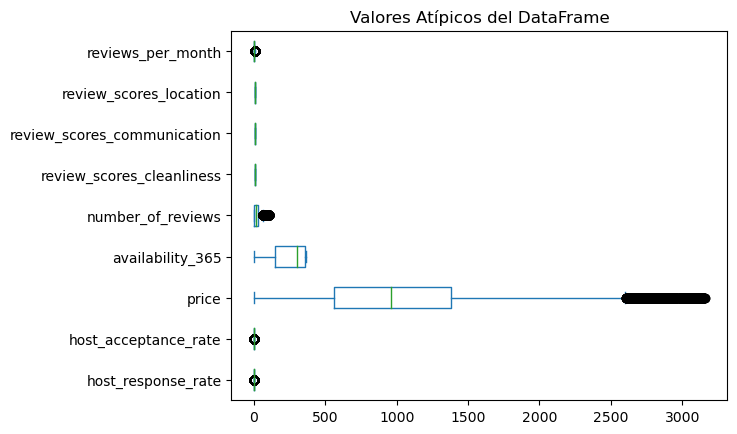

In [13]:
fig = plt.figure(figsize = (15, 8))
datos.plot(kind='box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show()

In [14]:
datos = pd.concat([df['room_type'], datos], axis = 1)
datos

,room_type,host_response_rate,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,Entire home/apt,1.0,1.00,1434.0,324,21.0,4.950000,4.950000,5.000000,0.190000
1,Entire home/apt,1.0,1.00,830.0,346,61.0,4.880000,5.000000,4.950000,0.540000
2,Entire home/apt,1.0,0.90,1469.0,87,39.0,4.710000,4.920000,4.900000,0.310000
3,Entire home/apt,1.0,1.00,1062.7,363,0.0,4.746342,4.815533,4.832627,1.702435
4,Entire home/apt,1.0,0.86,1062.7,357,64.0,4.700000,4.780000,4.980000,0.460000
...,...,...,...,...,...,...,...,...,...,...
24219,Entire home/apt,1.0,1.00,760.0,352,0.0,4.746342,4.815533,4.832627,1.702435
24220,Entire home/apt,1.0,1.00,1520.0,365,0.0,4.746342,4.815533,4.832627,1.702435
24221,Private room,1.0,0.96,533.0,180,0.0,4.746342,4.815533,4.832627,1.702435
24222,Entire home/apt,1.0,1.00,1200.0,344,0.0,4.746342,4.815533,4.832627,1.702435


## Filtros en DataFrame

In [15]:
datos_prvt_room = datos[datos['room_type'] == 'Private room']
datos_prvt_room = datos_prvt_room.drop(['room_type'], axis=1)
datos_entire = datos[datos['room_type'] == 'Entire home/apt']
datos_entire = datos_entire.drop(['room_type'], axis=1)

## Regresión Lineal Simple (Private room)

In [ ]:
from sklearn.linear_model import LinearRegression

variables = [['host_acceptance_rate','host_response_rate'],
             ['host_acceptance_rate','price'],
             ['host_acceptance_rate','number_of_reviews'],
             ['review_scores_location','review_scores_cleanliness'],
             ['availability_365','number_of_reviews'],
             ['reviews_per_month','review_scores_communication']]

cont = 1
df_coe_prvt_room = pd.DataFrame(columns=['Determinación', 'Correlación'])

for dep, ind in variables:
    Vars_Indep= datos_prvt_room[[ind]]
    Var_Dep= datos_prvt_room[dep]

    model= LinearRegression()

    model.fit(X=Vars_Indep, y=Var_Dep)

    model.__dict__

    y_pred= model.predict(X=datos_prvt_room[[ind]])
    y_pred
    
    print('Predicción',str(cont),'- Dependiente:',str(dep),'vs Independiente:',str(ind))
    columna = 'Prediccion '+ str(cont)
    datos_prvt_room.insert(0,columna, y_pred)
    cont += 1
    display(datos_prvt_room)
    
    sns.scatterplot(x=ind, y=dep, color="blue", data=datos_prvt_room)
    sns.scatterplot(x=ind, y=columna, color="red", data=datos_prvt_room)
    sns.lineplot(x=ind, y=columna, color="red", data=datos_prvt_room)
    plt.show()

    coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
    print('Coeficiente de Determinación del Modelo:',coef_Deter)

    coef_Correl=np.sqrt(coef_Deter)
    print('Coeficiente de Correlación del Modelo:',coef_Correl)
    df_coe_prvt_room.loc[len(df_coe_prvt_room)] = [coef_Deter, coef_Correl]
    
    sns.pairplot(datos_prvt_room)
    plt.show()

    Corr_Factors=datos_prvt_room.corr()
    print('Correlación entre variables') 
    display(Corr_Factors)

    Corr_Factors1= abs(Corr_Factors)
    Corr_Factors1
    print('Correlación absoluta entre variables') 
    display(Corr_Factors1)
    
    Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
    Heat_Map
    plt.show()
    
display(df_coe_prvt_room)

## Regresión Lineal Simple (Entire home/apt)

In [ ]:
from sklearn.linear_model import LinearRegression

variables = [['host_acceptance_rate','host_response_rate'],
             ['host_acceptance_rate','price'],
             ['host_acceptance_rate','number_of_reviews'],
             ['review_scores_location','review_scores_cleanliness'],
             ['availability_365','number_of_reviews'],
             ['reviews_per_month','review_scores_communication']]

cont = 1
df_coe_entire = pd.DataFrame(columns=['Determinación', 'Correlación'])

for dep, ind in variables:
    Vars_Indep= datos_entire[[ind]]
    Var_Dep= datos_entire[dep]

    model= LinearRegression()

    model.fit(X=Vars_Indep, y=Var_Dep)

    model.__dict__

    y_pred= model.predict(X=datos_entire[[ind]])
    y_pred
    
    print('Predicción',str(cont),'- Dependiente:',str(dep),'vs Independiente:',str(ind))
    columna = 'Prediccion '+ str(cont)
    datos_entire.insert(0,columna, y_pred)
    cont += 1
    display(datos_entire)
    
    sns.scatterplot(x=ind, y=dep, color="blue", data=datos_entire)
    sns.scatterplot(x=ind, y=columna, color="red", data=datos_entire)
    sns.lineplot(x=ind, y=columna, color="red", data=datos_entire)
    plt.show()

    coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
    print('Coeficiente de Determinación del Modelo:',coef_Deter)

    coef_Correl=np.sqrt(coef_Deter)
    print('Coeficiente de Correlación del Modelo:',coef_Correl)
    df_coe_entire.loc[len(df_coe_entire)] = [coef_Deter, coef_Correl]

    sns.pairplot(datos_entire)
    plt.show()

    Corr_Factors=datos_entire.corr()
    print('Correlación entre variables') 
    display(Corr_Factors)

    Corr_Factors1= abs(Corr_Factors)
    Corr_Factors1
    print('Correlación absoluta entre variables') 
    display(Corr_Factors1)
    
    Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
    Heat_Map
    plt.show()
    
display(df_coe_entire)

## Coeficientes de determinación y correlación por modelo (Private room)
De los modelos ejecutados econtramos que el modelo perteneciente a:

Predicción 4 - Dependiente: review_scores_location vs Independiente: review_scores_cleanliness

Es aquel que cuenta con un mayor coeficiente de correlación, indicando que esta combinación de variables tienen la mayor intensidad de relación lineal para las habitaciones de tipo (Private room).

Este valor de correlación más cercano a 1 indica mayor correlación positiva entre la variable independiente y la variable dependiente, sin embargo este es comparado entre los modelos pues en general el coeficiente es bajo.

In [19]:
df_coe_prvt_room

,Determinación,Correlación
0,0.002760,0.052539
1,0.002032,0.045080
2,0.000075,0.008668
3,0.150132,0.387469
4,0.005204,0.072142
5,0.086675,0.294407


## Coeficientes de determinación y correlación por modelo (Entire home/apt)
De los modelos ejecutados econtramos que el modelo perteneciente a:

Predicción 4 - Dependiente: review_scores_location vs Independiente: review_scores_cleanliness

Es aquel que cuenta con un mayor coeficiente de correlación, indicando que esta combinación de variables tienen la mayor intensidad de relación lineal para las habitaciones de tipo (Entire home/apt).

Este valor de correlación más cercano a 1 indica mayor correlación positiva entre la variable independiente y la variable dependiente, sin embargo este es comparado entre los modelos pues en general el coeficiente es bajo.

In [20]:
df_coe_entire

,Determinación,Correlación
0,0.009417,0.097043
1,0.000659,0.025670
2,0.002941,0.054232
3,0.076142,0.275939
4,0.003951,0.062856
5,0.014471,0.120294


De lo anteriror podemos inferir que las variables con mayor correlación tanto para las habitaciones de tipo (Private room) y (Entire home/apt) son Dependiente: ***review_scores_location*** vs Independiente: ***review_scores_cleanliness***